O conjunto de dados contém apenas variáveis numéricas de entrada que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Características V1, V2, ... V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Time' e 'Amount'.
<br>O atributo 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o Valor da transação, esse recurso pode ser usado por exemplo, dependendo do aprendizado sensível ao custo. O recurso 'Class' é a variável de resposta e leva valor 1 em caso de fraude e 0 caso contrário.

### Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Carregar os dados e visulaizar os 5 primeiros registros

In [2]:
dados = pd.read_csv('creditcard.csv')
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Pré-processamento dos dados
É importante normalizar os dados para que as características tenham a mesma escala.

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dados.drop('Class', axis=1))

### Escolher o número de clusters
Vamos usar o método do cotovelo (Elbow Method) para escolher o número ideal de clusters

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

Explicando o código acima:
<ol>
<li>wcss = [] - cria uma lista vazia que será usada para armazenar os valores da soma dos quadrados das distâncias dentro de cada cluster para diferentes números de clusters</li>
<li>for i in range(1, 11) - inicia um loop que vai de 1 a 10 (ou qualquer intervalo desejado de números de clusters que você deseja considerar). Neste caso, ele testará de 1 a 10 clusters.</li>
<li>init='k-means++' - define o método de inicialização dos centróides. "k-means++" é uma técnica de inicialização inteligente que ajuda a escolher os centróides iniciais de forma mais eficaz.</li>
<li>max_iter=300 - número máximo de iterações permitidas em cada execução do K-Means.</li>
<li>n_init=10 - número de vezes que o algoritmo será executado com diferentes centróides iniciais. O resultado final será o melhor entre essas execuções.</li>
<li>random_state = 0 - define a semente para a geração de números aleatórios, o que torna os resultados reproduzíveis.</li>
<li>kmeans.fit(scaled_data) - onde se treina o modelo K-Means com os dados normalizados (scaled_data). O modelo tentará agrupar os dados em 'i' clusters</li>
<li>wcss.append(kmeans.inertia_) - Após o treinamento de cada modelo K-Means com um número específico de clusters, calcula a soma dos quadrados das distâncias entre os pontos de dados e os centróides de seus clusters. Essa soma é chamada de "Within-Cluster Sum of Squares" (WCSS) e é uma medida da dispersão dos pontos de dados dentro dos clusters. O valor do WCSS é então adicionado à lista wcss.</li>
</ol>
Após o treinamento de cada modelo K-Means com um número específico de clusters, você calcula a soma dos quadrados das distâncias entre os pontos de dados e os centróides de seus clusters. Essa soma é chamada de "Within-Cluster Sum of Squares" (WCSS) e é uma medida da dispersão dos pontos de dados dentro dos clusters. O valor do WCSS é então adicionado à lista wcss.

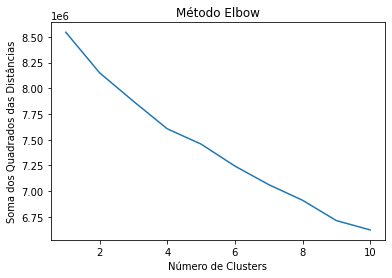

In [5]:
# Plotar o gráfico do método elbow
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show();

Para determinar o ponto do cotovelo no gráfico gerado devemos observar a curva e procurar o ponto onde a redução no WCSS começa a desacelerar notavelmente. A ideia é encontrar um ponto onde adicionar um cluster adicional não resulta em uma melhoria significativa na compactação dos dados dentro dos clusters.
<br>
Uma vez que você tenha identificado esse ponto, o número correspondente de clusters é frequentemente escolhido como o número ideal de clusters para seu problema.<br>
No gráfico acima o ponto do 'cotovel' parece estar em torno de 2 ou 3 clusters. Portanto, vamos assumir 2 ou 3 clusters como o número ideal.


### Treinar o modelo de clustering

In [6]:
num_cluster = 2
kmeans = KMeans(n_clusters=num_cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

### Atribuir rótulos de cluster

In [7]:
dados['Cluster'] = kmeans.labels_

### Analisar os resultados
Silhouette score (índice de silhueta) - mede a coesão dentro dos clusters e a separação entre os clusters

In [10]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data,cluster_labels)
print(f'Índice de Silhueta: {silhouette_avg}')

Índice de Silhueta: 0.06710408970157307


### Visualização para entender melhor os clusters

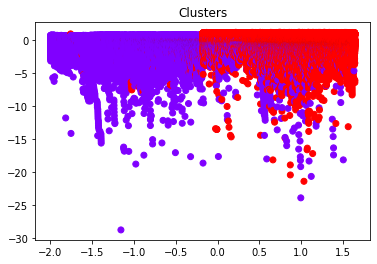

In [9]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dados['Cluster'], cmap='rainbow')
plt.title('Clusters')
plt.show()

Pelo gráfico acima, tem dois clusters claramente visíveis e bem separados até um certo ponto no eixo x (0.0), mas depois os pontos de clusters diferentes começam a se sobrepor, isso sugere que o algoritmo de clustering foi capaz de agrupar os dados de maneira eficaz em uma determinada faixa de valores da primeira característica (eixo x), mas encontrou dificuldades em separar os clusters à medida que essa característica aumenta.
<p>Em resumo, a sobreposição de clusters após um certo ponto no eixo x indica uma complexidade na estrutura dos dados. Isso pode exigir uma análise mais aprofundada para entender os fatores que estão levando à sobreposição e para tomar decisões sobre como lidar com essa complexidade na tarefa de detecção de padrões ou detecção de fraudes, dependendo do contexto do problema.</p>